In [ ]:
import torch
from torchvision import datasets , transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ),
(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset , batch_size =32, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [ ]:
batch = next(iter(trainloader))
print(batch[0].shape, batch[1].shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


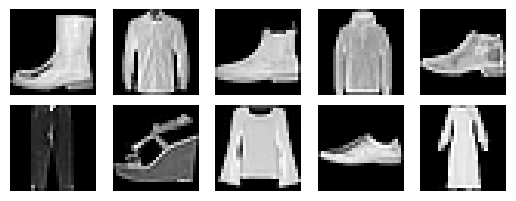

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
for i in range(2):
  for j in range(5):
    image, label = next(iter(trainloader))
    ax[i][j].set_axis_off()
    ax[i][j].imshow(image[0,0,:], cmap='gray')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 32),  # Input layer to hidden layer
    nn.ReLU(),                        # ReLU activation function
    nn.Linear(32, 784))  # Hidden layer to output layer


In [ ]:
model2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),  # Input layer to hidden layer
    nn.ReLU(),                        # ReLU activation function
    nn.Linear(100, 784))  # Hidden layer to output layer

In [ ]:
model3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Input layer to hidden layer
    nn.ReLU(),                        # ReLU activation function
    nn.Linear(256, 784))  # Hidden layer to output layer

In [ ]:
model4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.Linear(100,64),
    nn.ReLU(),
    nn.Linear(64,100),
    nn.Linear(100, 784))

In [ ]:
model5 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.Linear(256, 784))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 50
loss_array = []
model.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model(images)
    loss = criterion(log_ps,labels)
    loss_array.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()


100%|██████████| 50/50 [11:36<00:00, 13.93s/it]


In [ ]:
model.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.50%


In [ ]:
optimizer = optim.SGD(model2.parameters(), lr=0.01)
epochs = 50
loss_array2 = []
model2.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model2(images)
    loss = criterion(log_ps,labels)
    loss_array2.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [11:57<00:00, 14.35s/it]


In [ ]:
model2.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model2(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.75%


In [ ]:
optimizer = optim.SGD(model3.parameters(), lr=0.01)
epochs = 50
loss_array2 = []
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model3(images)
    loss = criterion(log_ps,labels)
    loss_array.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:13<00:00, 14.68s/it]


In [ ]:
model3.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model3(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [ ]:
optimizer = optim.SGD(model4.parameters(), lr=0.01)
epochs = 50
loss_array4 = []
model4.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model4(images)
    loss = criterion(log_ps,labels)
    loss_array4.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:34<00:00, 15.10s/it]


In [ ]:
model4.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model4(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.75%


In [ ]:
optimizer = optim.SGD(model5.parameters(), lr=0.01)
epochs = 50
loss_array5 = []
model5.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model5(images)
    loss = criterion(log_ps,labels)
    loss_array5.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:54<00:00, 15.49s/it]


In [ ]:
model5.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model5(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.50%


In [ ]:
model3_tanh = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Input layer to hidden layer
    nn.Tanh(),                        # ReLU activation function
    nn.Linear(256, 784))  # Hidden layer to output layer

In [ ]:
model3_sigmoid = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Input layer to hidden layer
    nn.Sigmoid(),                        # ReLU activation function
    nn.Linear(256, 784))  # Hidden layer to output layer

In [ ]:
model3_elu = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Input layer to hidden layer
    nn.ELU(),                        # ReLU activation function
    nn.Linear(256, 784))  # Hidden layer to output layer

In [ ]:
optimizer = optim.SGD(model3_tanh.parameters(), lr=0.01)
epochs = 50
loss_array5 = []
model3_tanh.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model3_tanh(images)
    loss = criterion(log_ps,labels)
    loss_array5.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:22<00:00, 14.86s/it]


In [ ]:
model3_tanh.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model3_tanh(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [ ]:
optimizer = optim.SGD(model3_sigmoid.parameters(), lr=0.01)
epochs = 50
loss_array5 = []
model3_sigmoid.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model3_sigmoid(images)
    loss = criterion(log_ps,labels)
    loss_array5.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:22<00:00, 14.85s/it]


In [ ]:
model3_sigmoid.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model3_sigmoid(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.50%


In [ ]:
optimizer = optim.SGD(model3_elu.parameters(), lr=0.01)
epochs = 50
loss_array5 = []
model3_elu.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model3_elu(images)
    loss = criterion(log_ps,labels)
    loss_array5.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|██████████| 50/50 [12:18<00:00, 14.76s/it]


In [ ]:
model3_elu.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model3_elu(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.75%


In [ ]:
model_cnn = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5, padding = 2),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(6272,100),
    nn.ReLU(),
    nn.Linear(100,10),
    nn.Softmax()
)

In [ ]:
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.9)

In [ ]:
epochs = 10
loss_array_cnn = []
model_cnn.train()
for i in tqdm(range(epochs)):
  for images, labels in trainloader:
    optimizer.zero_grad()
    # flat = images.view(images.shape[0],-1)
    log_ps = model_cnn(images)
    loss = criterion(log_ps,labels)
    loss_array_cnn.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 10/10 [03:17<00:00, 19.73s/it]


In [ ]:
model_cnn.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model_cnn(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy: 87.50%


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
indices = list(range(len(trainset)))
np.random.shuffle(indices)
split = int(np.floor(.2*len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])


In [ ]:
trainloader_2 = torch.utils.data.DataLoader(trainset,sampler=train_sample , batch_size =32)
validloader = torch.utils.data.DataLoader(trainset, sampler = valid_sample , batch_size =32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
epochs = 50
t_accuracy_10 = []
v_accuracy_10 = []
total_samples_train = 0
total_correct_train = 0
total_correct_val = 0
total_samples_val = 0
for j in tqdm(range(epochs)):
  correct = 0
  model_cnn.train()
  for inputs, labels in trainloader_2:
    optimizer.zero_grad()
    log_ps = model_cnn(images)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs, 1)
    total_samples_train += labels.size(0)
    total_correct_train += (predicted == labels).sum().item()
  train_accuracy = total_correct_train / total_samples_train
  if j%10 == 0 and j != 0:
    t_accuracy_10.append(train_accuracy)
    model_cnn.eval()
    with torch.no_grad():
        for inputs, labels in validloader:
          outputs = model_cnn(inputs)
          _, predicted = torch.max(outputs, 1)
          total_samples_val += labels.size(0)
          total_correct_val += (predicted == labels).sum().item()

    val_accuracy = total_correct_val / total_samples_val
    v_accuracy_10.append(val_accuracy)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 50/50 [04:11<00:00,  5.03s/it]


In [ ]:
print(t_accuracy_10)
print(v_accuracy_10)

[0.09805303030303031, 0.09826587301587301, 0.09808064516129032, 0.09796138211382113]
[0.16527083333333334, 0.16527083333333334, 0.16527083333333334, 0.16527083333333334]


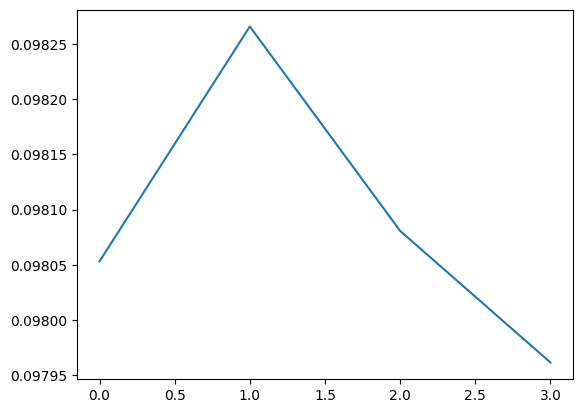

In [ ]:
plt.plot(t_accuracy_10)

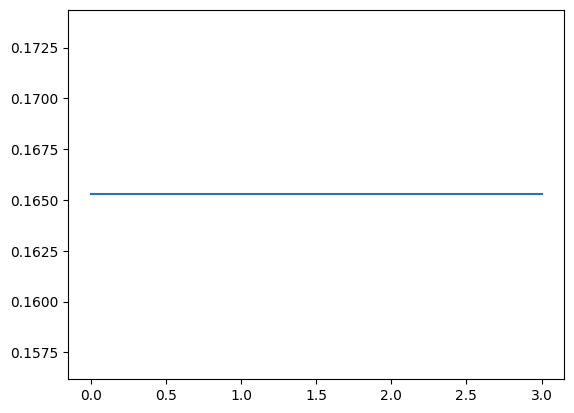

In [ ]:
plt.plot(v_accuracy_10)

In [ ]:
model_cnn_dropout = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5, padding = 2),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(6272,100),
    nn.ReLU(),
    nn.Dropout(.5),
    nn.Linear(100,10),
    nn.Softmax()
)
optimizer_d = optim.SGD(model_cnn_dropout.parameters(), lr=0.01, momentum=0.9)

In [ ]:
epochs = 50
t_accuracy_10 = []
v_accuracy_10 = []
total_samples_train = 0
total_correct_train = 0
total_correct_val = 0
total_samples_val = 0
for j in tqdm(range(epochs)):
  correct = 0
  model_cnn_dropout.train()
  for inputs, labels in trainloader_2:
    optimizer_d.zero_grad()
    log_ps = model_cnn_dropout(images)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer_d.step()
    _, predicted = torch.max(outputs, 1)
    total_samples_train += labels.size(0)
    total_correct_train += (predicted == labels).sum().item()
  train_accuracy = total_correct_train / total_samples_train
  if j%10 == 0 and j != 0:
    t_accuracy_10.append(train_accuracy)
    model_cnn_dropout.eval()
    with torch.no_grad():
        for inputs, labels in validloader:
          outputs = model_cnn_dropout(inputs)
          _, predicted = torch.max(outputs, 1)
          total_samples_val += labels.size(0)
          total_correct_val += (predicted == labels).sum().item()

    val_accuracy = total_correct_val / total_samples_val
    v_accuracy_10.append(val_accuracy)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 50/50 [04:44<00:00,  5.69s/it]


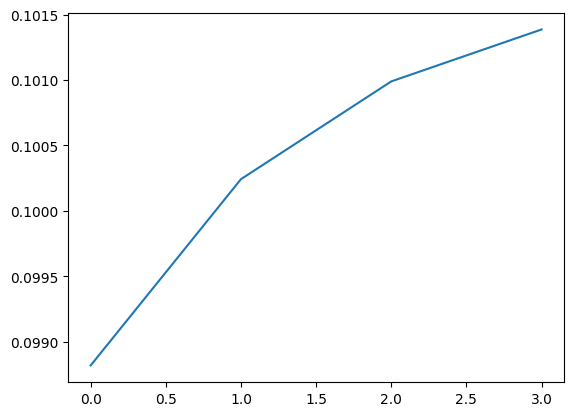

In [ ]:
plt.plot(t_accuracy_10)

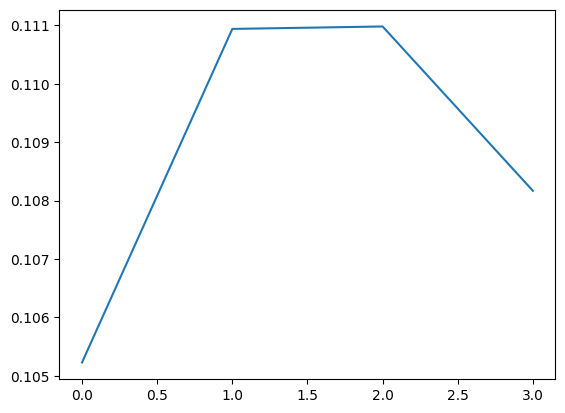

In [ ]:
plt.plot(v_accuracy_10)

In [ ]:
model_d2 = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5, padding = 2),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, padding = 2),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(3136,100),
    nn.ReLU(),
    nn.Dropout(.5),
    nn.Linear(100,10),
    nn.Softmax()
)
optimizer_2_2 = optim.SGD(model_d2.parameters(), lr=0.01, momentum=0.9)

In [ ]:
batch = next(iter(trainloader_2))
print(batch[0].shape, batch[1].shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [ ]:
criterion = nn.CrossEntropyLoss()
epochs = 10
model_d2.train()
for j in tqdm(range(epochs)):
  for inputs, labels in trainloader:
    optimizer_2_2.zero_grad()
    log_ps = model_d2(inputs)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer_2_2.step()

100%|██████████| 10/10 [06:17<00:00, 37.76s/it]


In [ ]:
model_d2.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model_d2(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy: 87.50%


In [ ]:
optimizer_2_3 = optim.SGD(model_d2.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
epochs = 10
model_d2.train()
for j in tqdm(range(epochs)):
  for inputs, labels in trainloader:
    optimizer_2_3.zero_grad()
    log_ps = model_d2(inputs)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer_2_3.step()

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 10/10 [08:29<00:00, 50.95s/it]


In [ ]:
model_d2.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model_d2(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 6.25%


In [ ]:
optimizer_2_4 = optim.SGD(model_d2.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()
epochs = 10
model_d2.train()
for j in tqdm(range(epochs)):
  for inputs, labels in trainloader:
    optimizer_2_4.zero_grad()
    log_ps = model_d2(inputs)
    loss = criterion(log_ps,labels)
    loss.backward()
    optimizer_2_4.step()

100%|██████████| 10/10 [04:46<00:00, 28.67s/it]


In [ ]:
model_d2.eval()
with torch.no_grad():
  for images, labels in testloader:
    outputs = model_d2(images)
    _, predicted = torch.max(outputs, axis=1)
    accuracy = (predicted.numpy() == labels.detach().numpy()).sum().item() / labels.shape[0]

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 6.25%
